In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

#划分数据集
from sklearn.model_selection import train_test_split

#将图像嵌入到单元格中
%matplotlib inline

#解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

#忽略警告
import warnings
warnings.filterwarnings('ignore')


In [2]:
#均方误差
def MSE(y_predict,y_test):
    return(np.sum(np.power(y_predict-y_test,2))/y_predict.shape[0])

In [3]:
#梯度下降法(样本数量小所以采用批量梯度下降)
def gradient_descent(alpha,times,X_train,y_train):
    theta=np.zeros(X_train.shape[1])#初始化
    cost=np.zeros(times)#记录损失
    for i in range(times):
        for j in range(X_train.shape[1]):
            theta[j]=theta[j]+(alpha/X_train.shape[0])*np.sum((y_train-np.dot(X_train,theta))*X_train[:,j])
        cost[i]=COST(X_train,y_train,theta)
    return theta,cost

In [4]:
#最小二乘法
def LSM(X_train_new,y_train):
    theta=np.linalg.inv(X_train_new.T.dot(X_train_new)).dot(X_train_new.T).dot(y_train)
    return theta

In [5]:
#标准化
def my_StandardScaler(X):
    x_mean=np.average(X,axis=0)#求平均
    x_std=np.std(X,axis=0)#求标准差
    return(X-x_mean)/x_std

In [6]:
#损失函数
def COST(X,y,theta):
    return np.sum(np.power(np.dot(X,theta)-y,2))/(2*X.shape[0])

In [7]:
#读取数据
data=pd.read_csv("boston_housing_data.csv")
print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222.0   

   PIRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [8]:
#数据大小
print(data.shape)
#数据基本统计量
print(data.describe())
print("#"*100)
#数据概况
print(data.info())

(506, 14)
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     1.269195   13.295257    9.205158    0.140765    1.101175   15.679800   
std      2.399207   23.048697    7.169630    0.312765    1.646991   27.220206   
min      0.000000    0.000000    0.000000    0.000000    0.385000    3.561000   
25%      0.049443    0.000000    3.440000    0.000000    0.449000    5.961500   
50%      0.144655    0.000000    6.960000    0.000000    0.538000    6.322500   
75%      0.819623   18.100000   18.100000    0.000000    0.647000    6.949000   
max      9.966540  100.000000   27.740000    1.000000    7.313000  100.000000   

              AGE         DIS         RAD         TAX     PIRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    58.744660    6.173308   78.063241  339.317787   42.614980  332.791107   
std     33.104049

In [9]:
#缺失值统计及补充
print(data.isnull().sum())
print("#"*100)
data["MEDV"].fillna(data["MEDV"].mean(),inplace=True)
print(data.isnull().sum())

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PIRATIO     0
B           0
LSTAT       0
MEDV       54
dtype: int64
####################################################################################################
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PIRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [10]:
#可视化

In [11]:
#相关系数
print(data.corr())

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.288969  0.586719 -0.067536 -0.139448 -0.185045  0.462470   
ZN      -0.288969  1.000000 -0.491587 -0.005843  0.038450  0.078721 -0.488006   
INDUS    0.586719 -0.491587  1.000000 -0.185873 -0.394483 -0.448809  0.700699   
CHAS    -0.067536 -0.005843 -0.185873  1.000000  0.585243  0.585447 -0.269616   
NOX     -0.139448  0.038450 -0.394483  0.585243  1.000000  0.975767 -0.550065   
RM      -0.185045  0.078721 -0.448809  0.585447  0.975767  1.000000 -0.595786   
AGE      0.462470 -0.488006  0.700699 -0.269616 -0.550065 -0.595786  1.000000   
DIS     -0.312843  0.268317 -0.605973  0.523772  0.923503  0.946946 -0.744068   
RAD     -0.151996  0.062767 -0.427834  0.587673  0.985957  0.992620 -0.585574   
TAX      0.754362 -0.256799  0.748951 -0.347552 -0.570346 -0.610962  0.635697   
PIRATIO -0.140015  0.049491 -0.351166  0.470870  0.775302  0.806522 -0.477048   
B       -0.053260  0.015810 

In [12]:
#设置图像大小
plt.style.use({"figure.figsize":(15,10)})

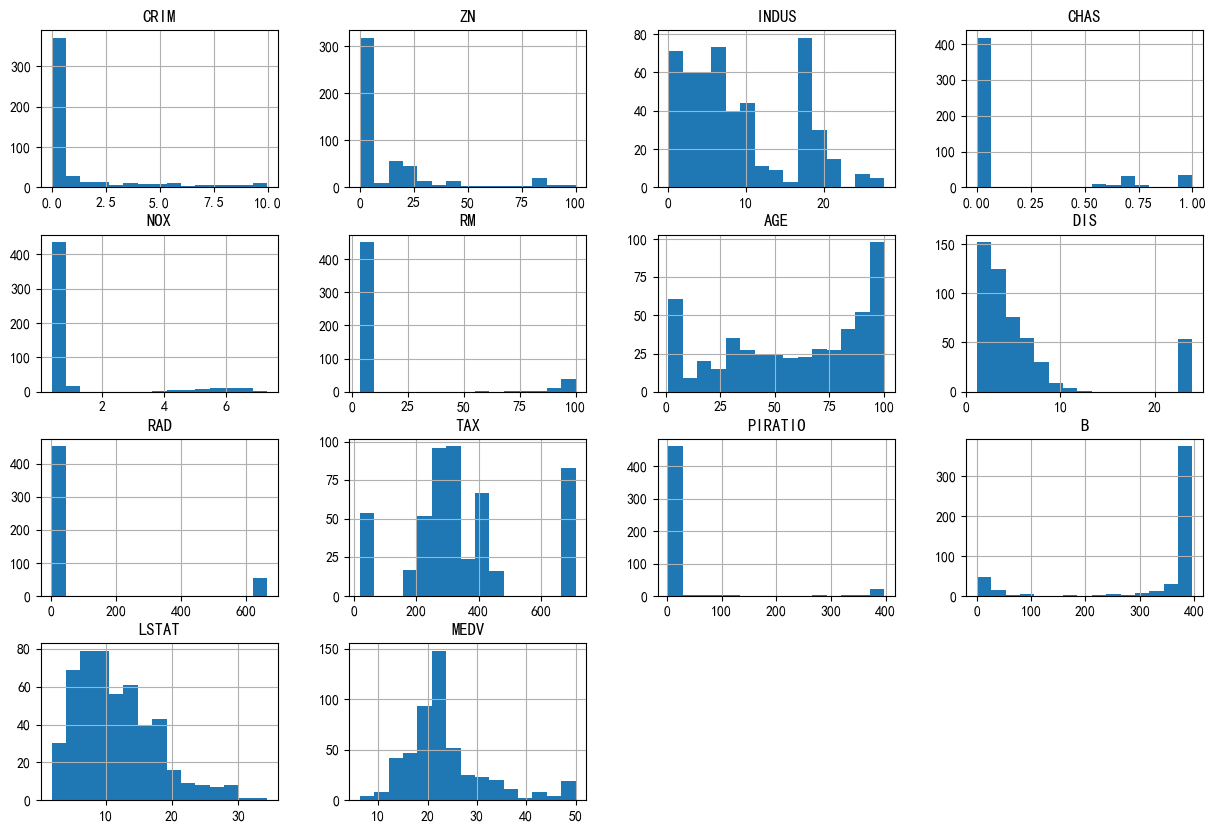

In [13]:
#直方图(bins为区段数)
data.hist(bins=15)
plt.show()

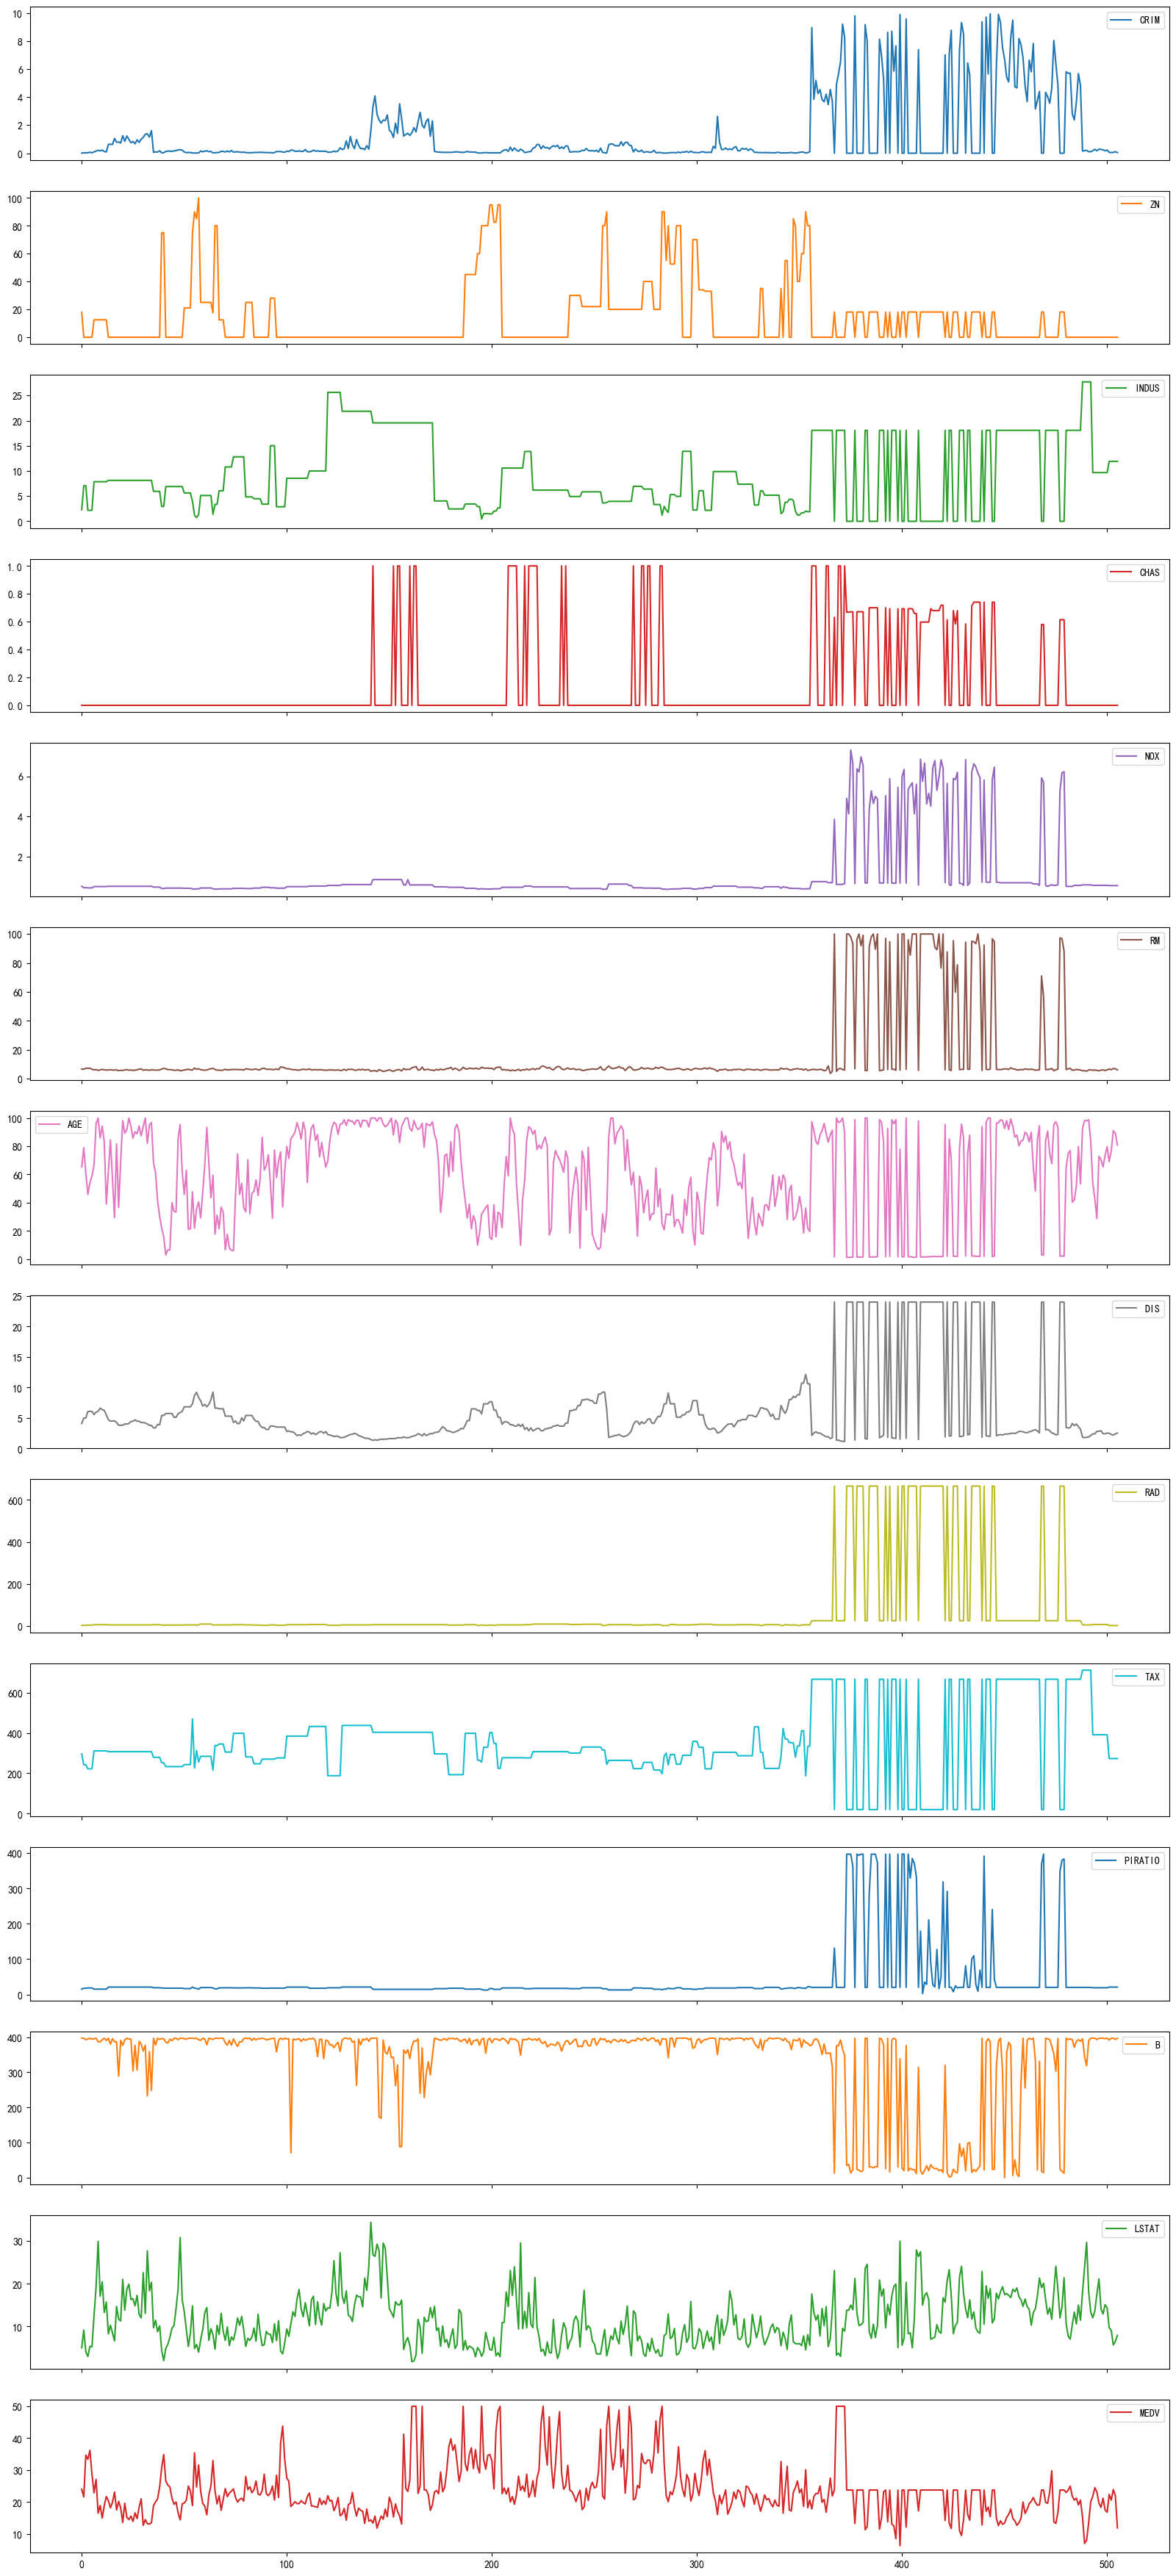

In [14]:
# 线性图
data.plot(subplots=True,figsize=(20,45))
plt.show()

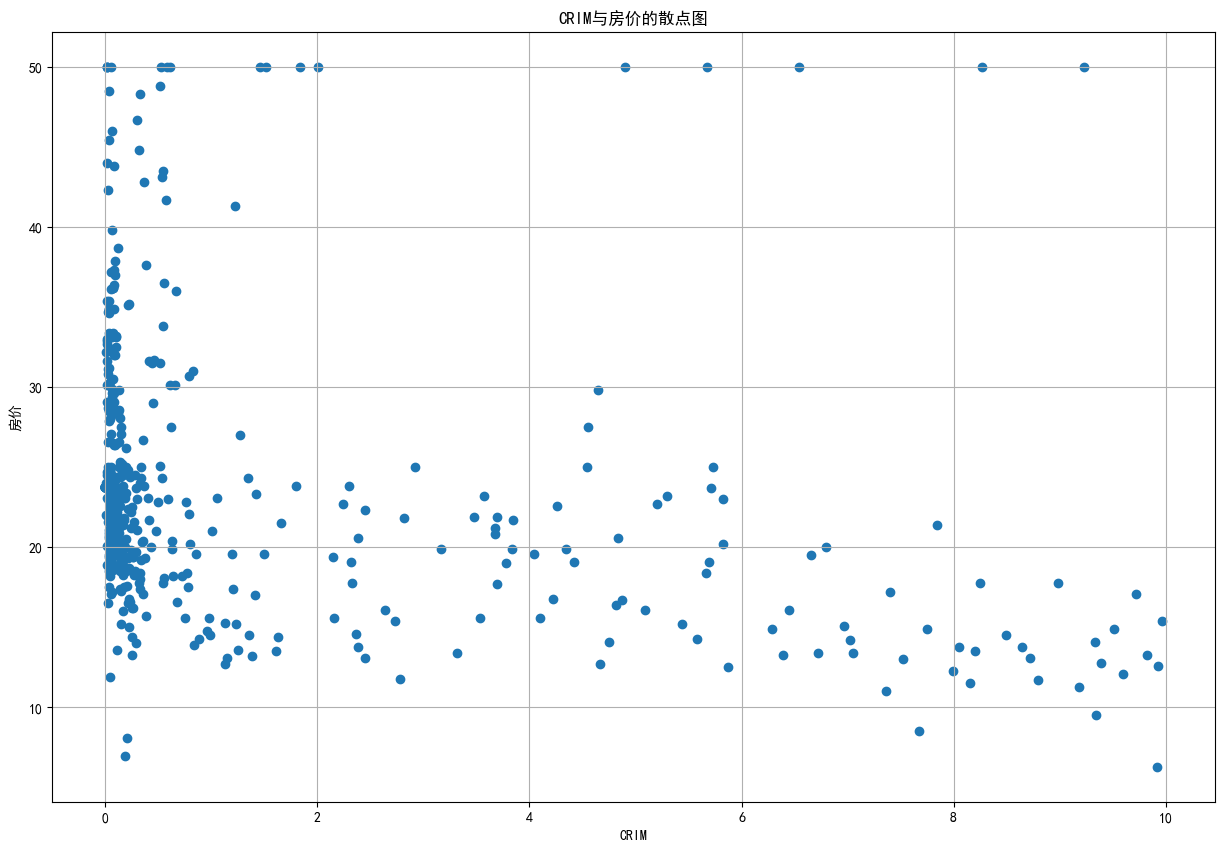

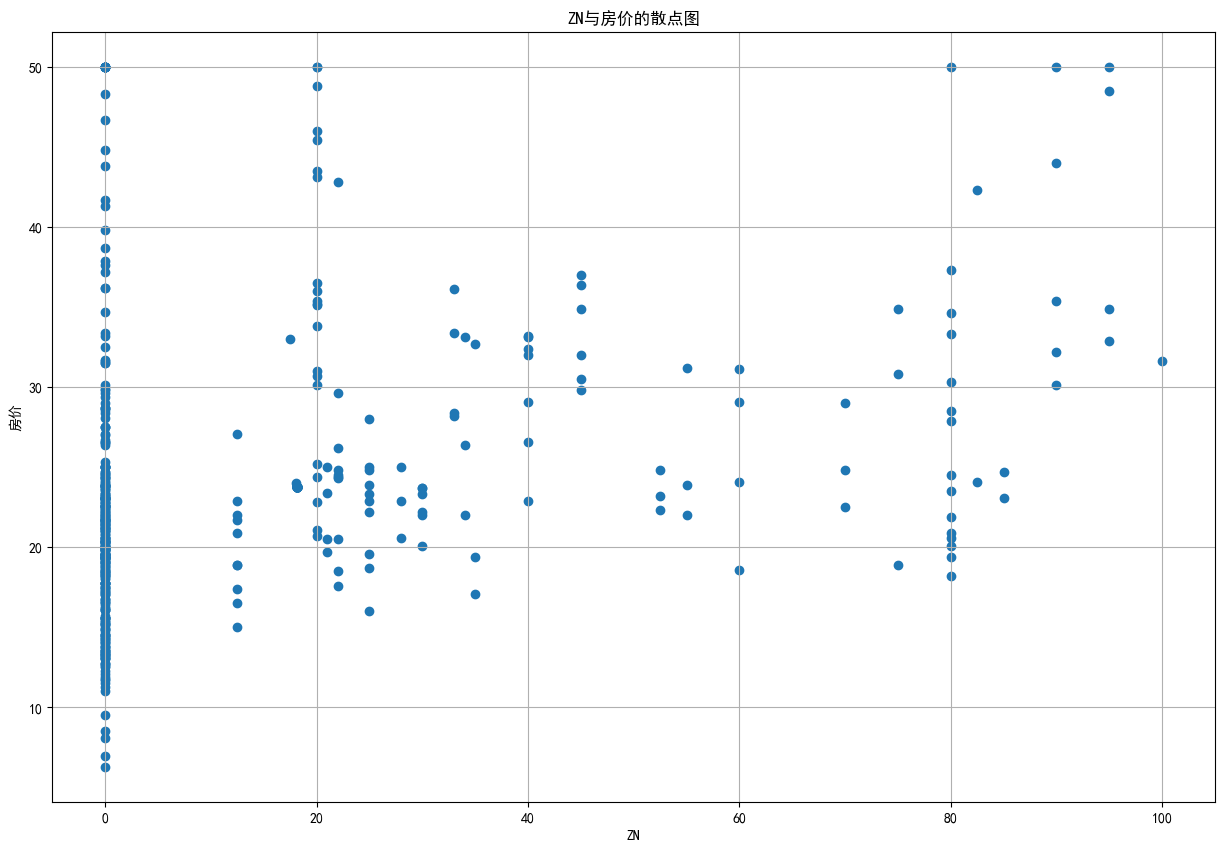

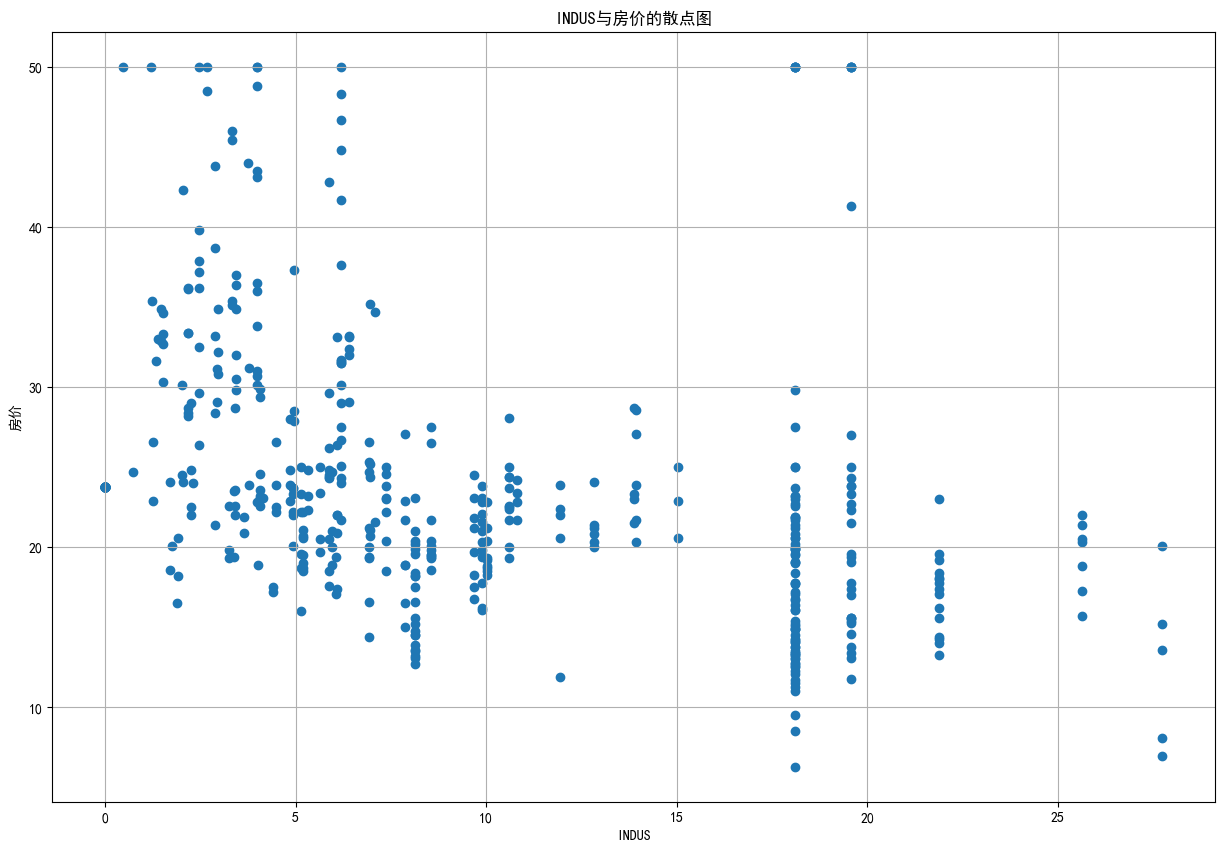

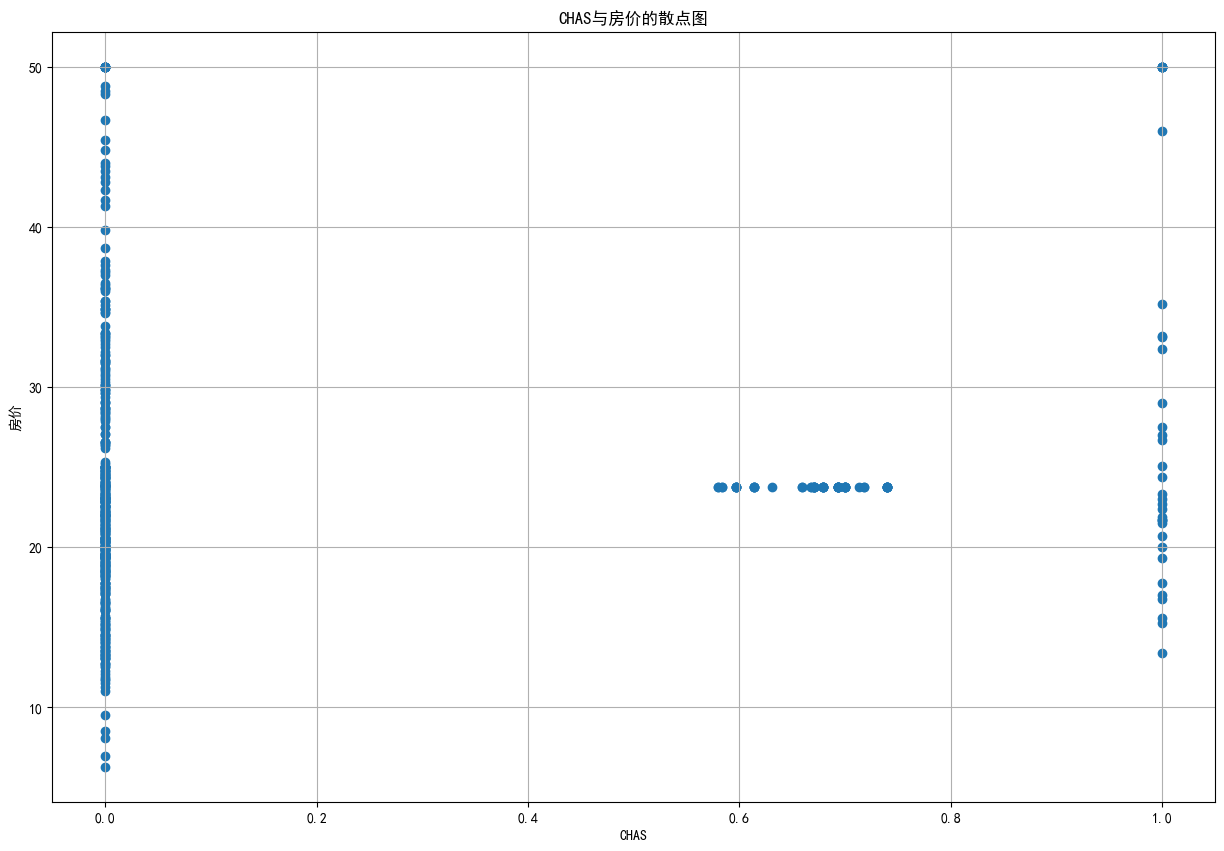

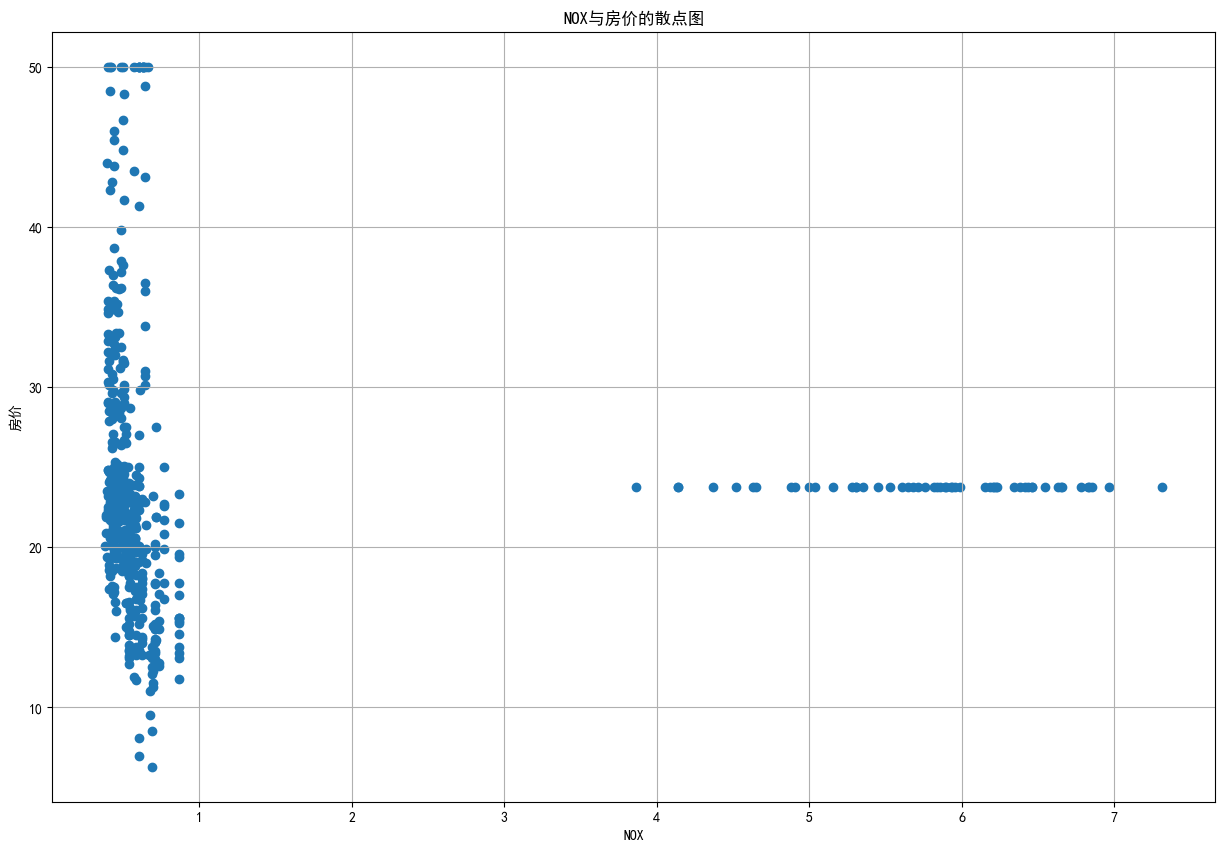

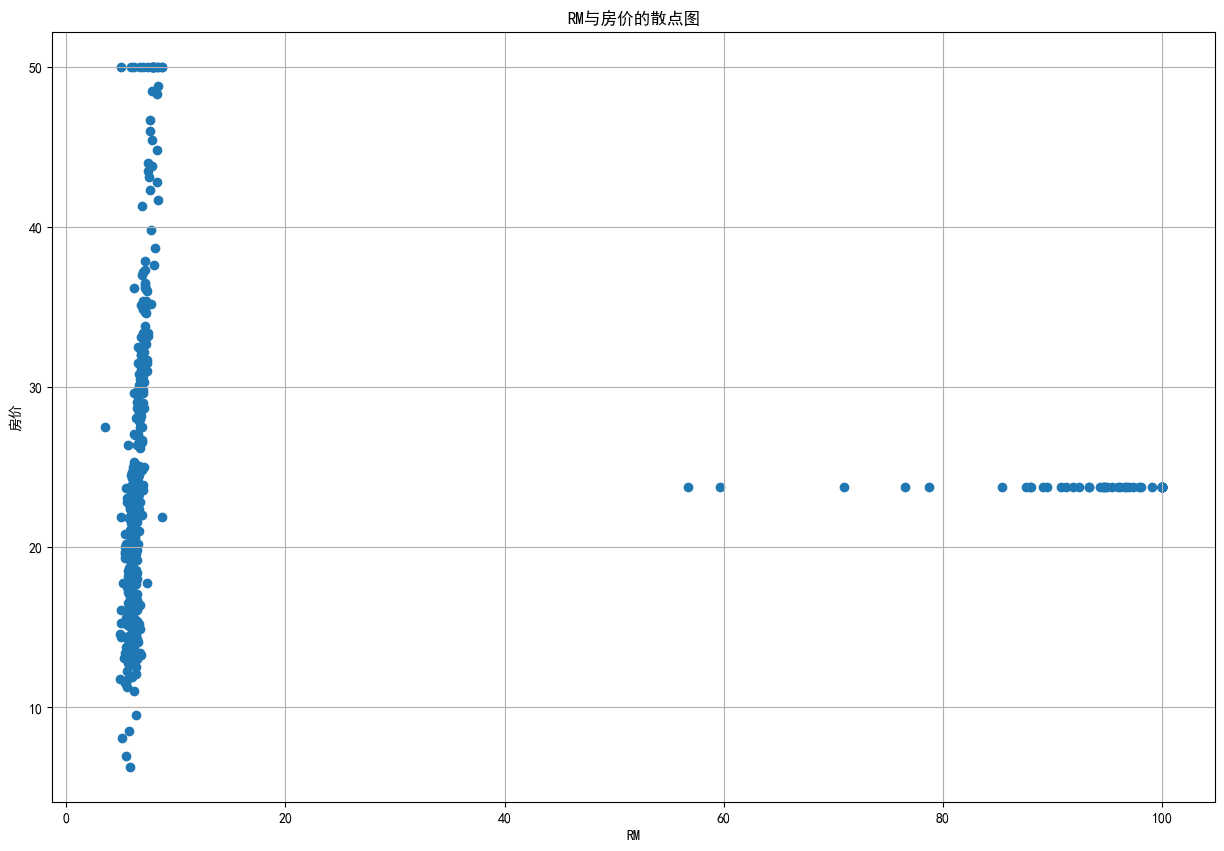

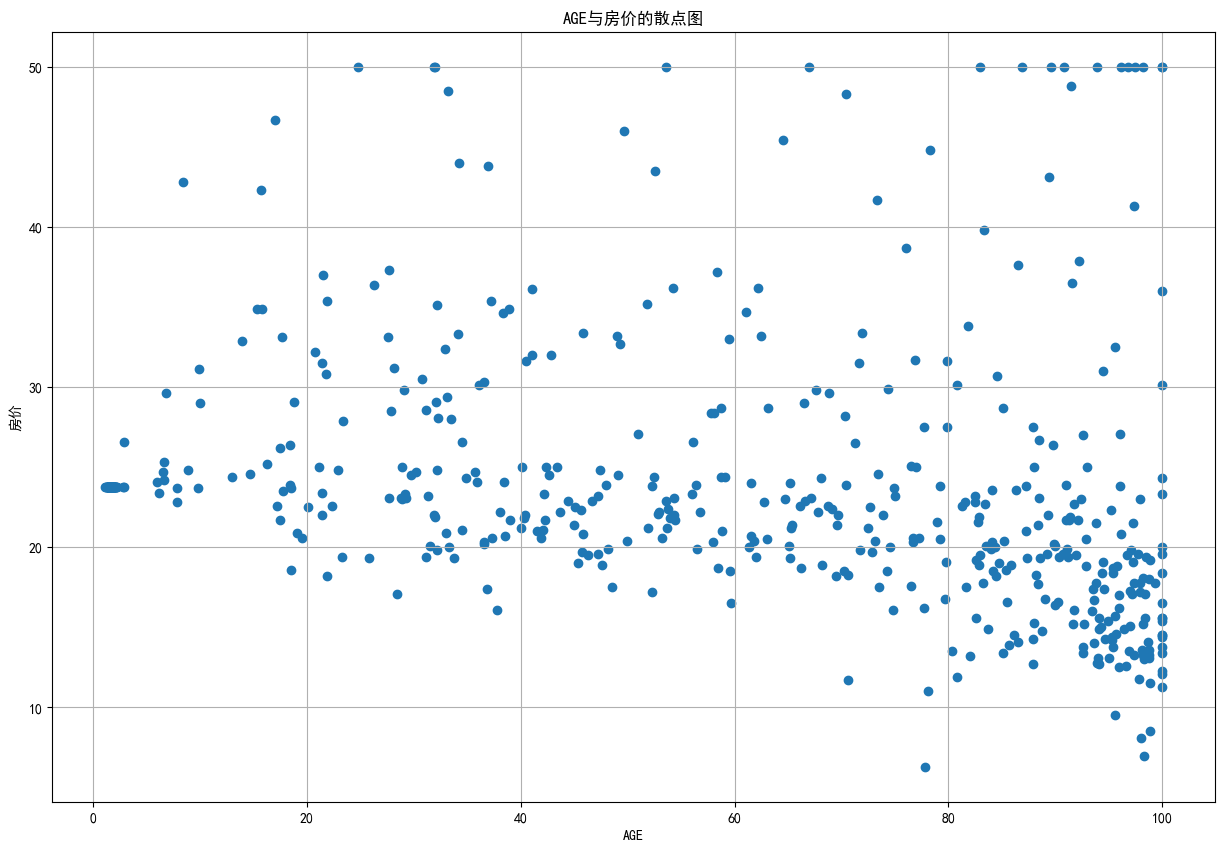

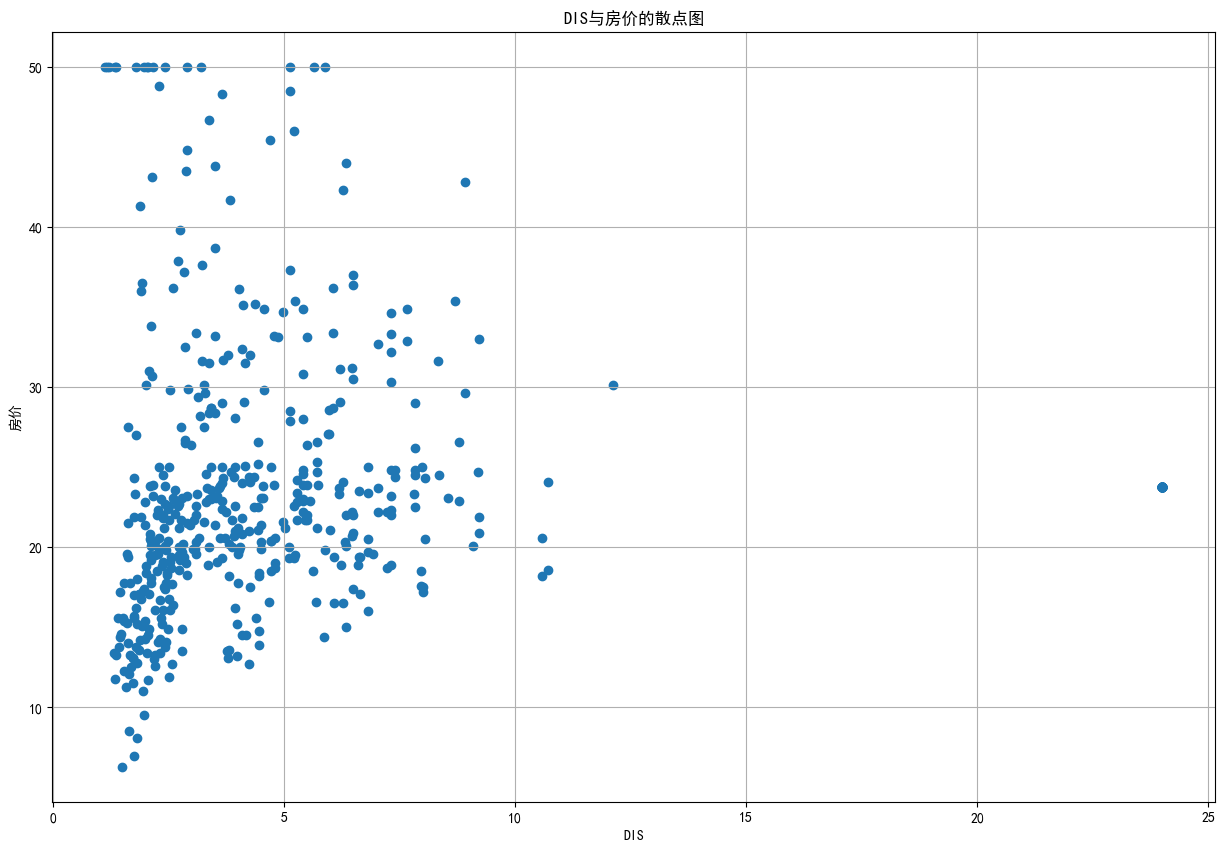

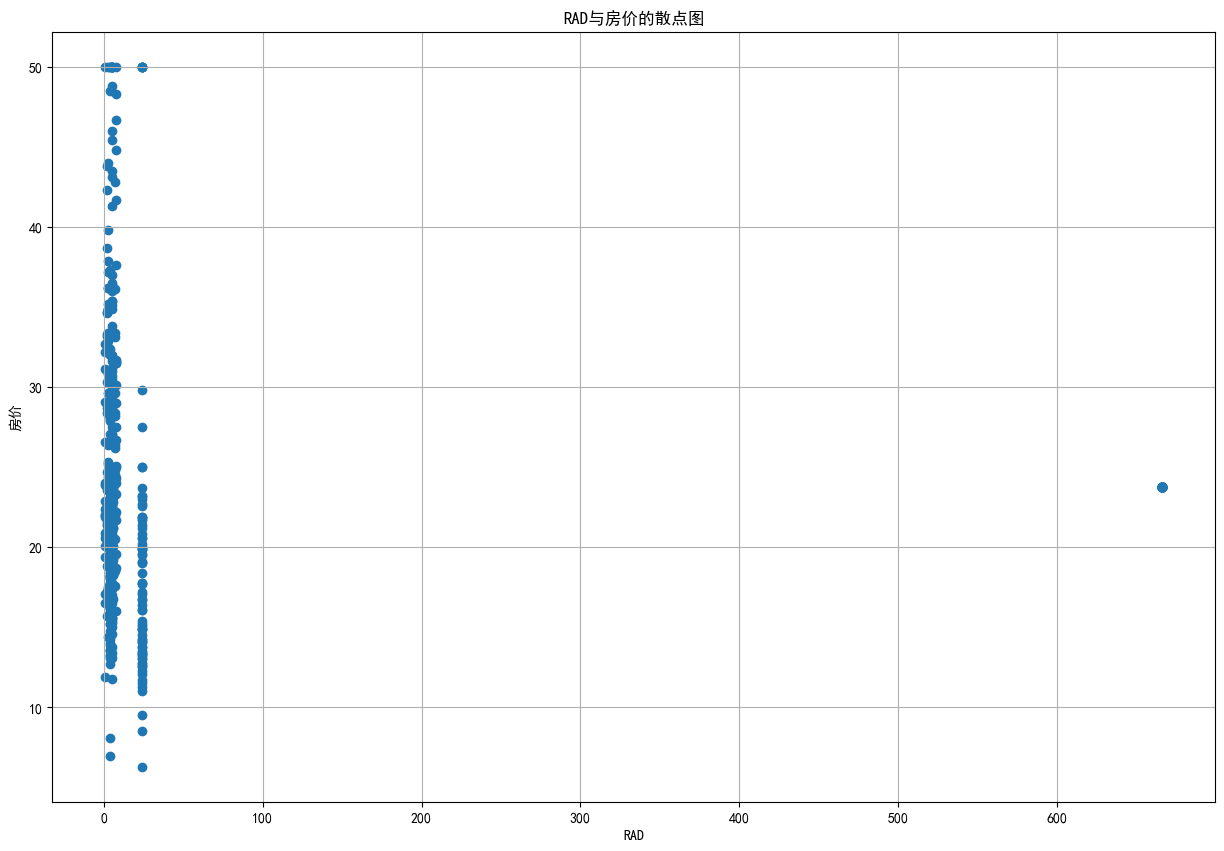

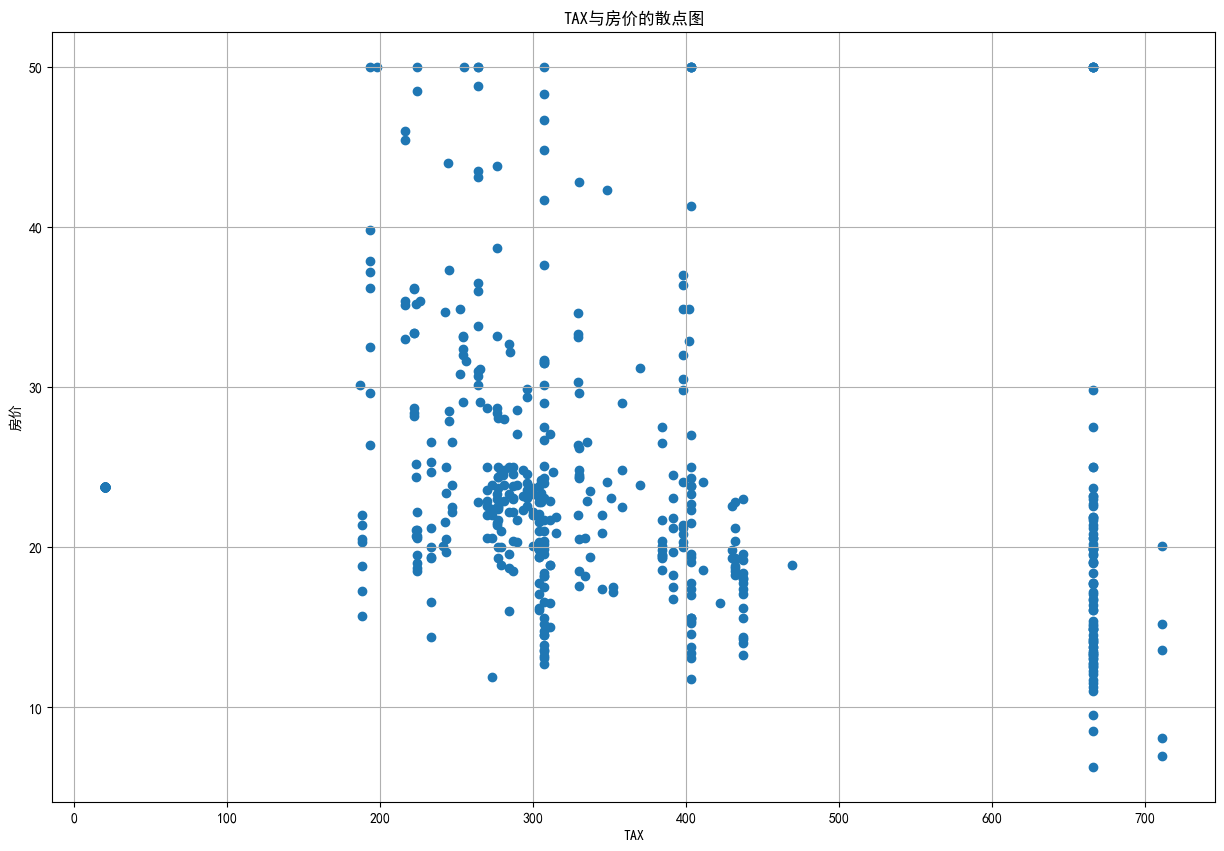

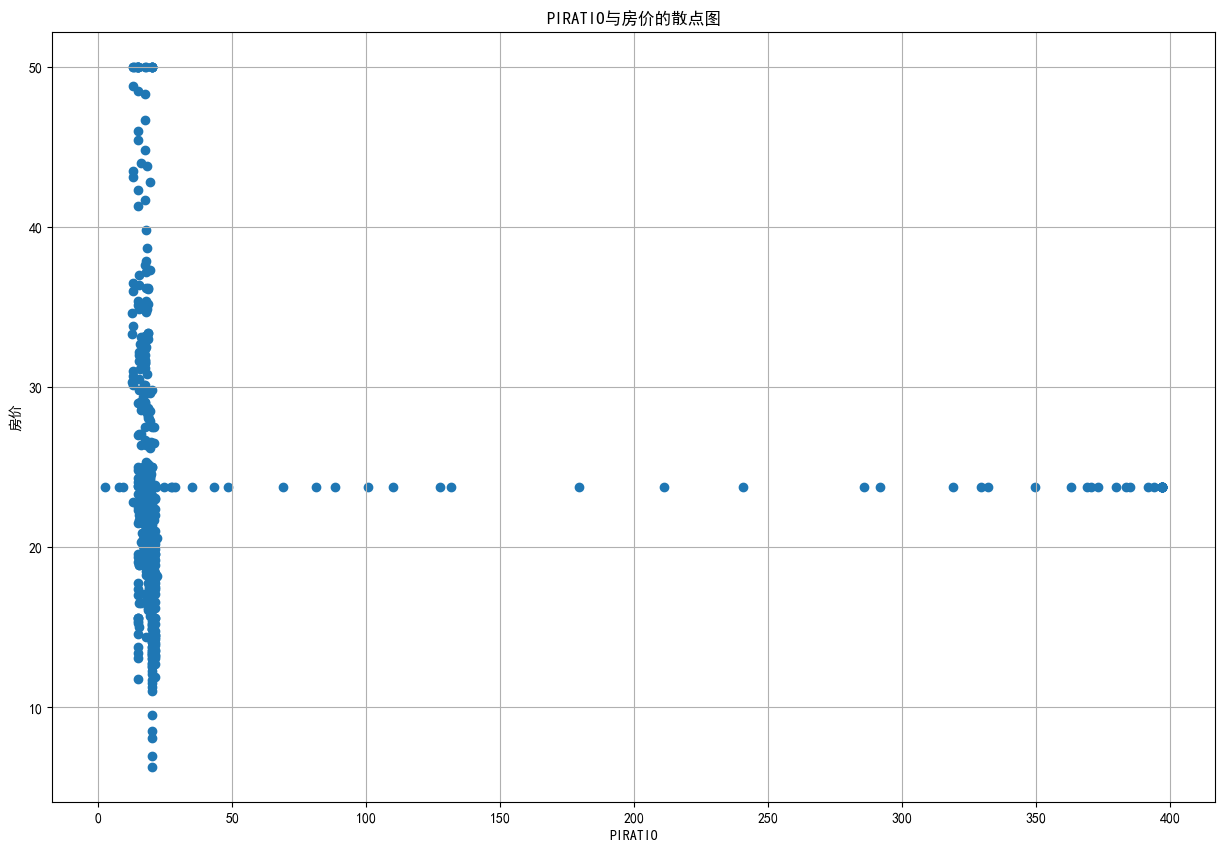

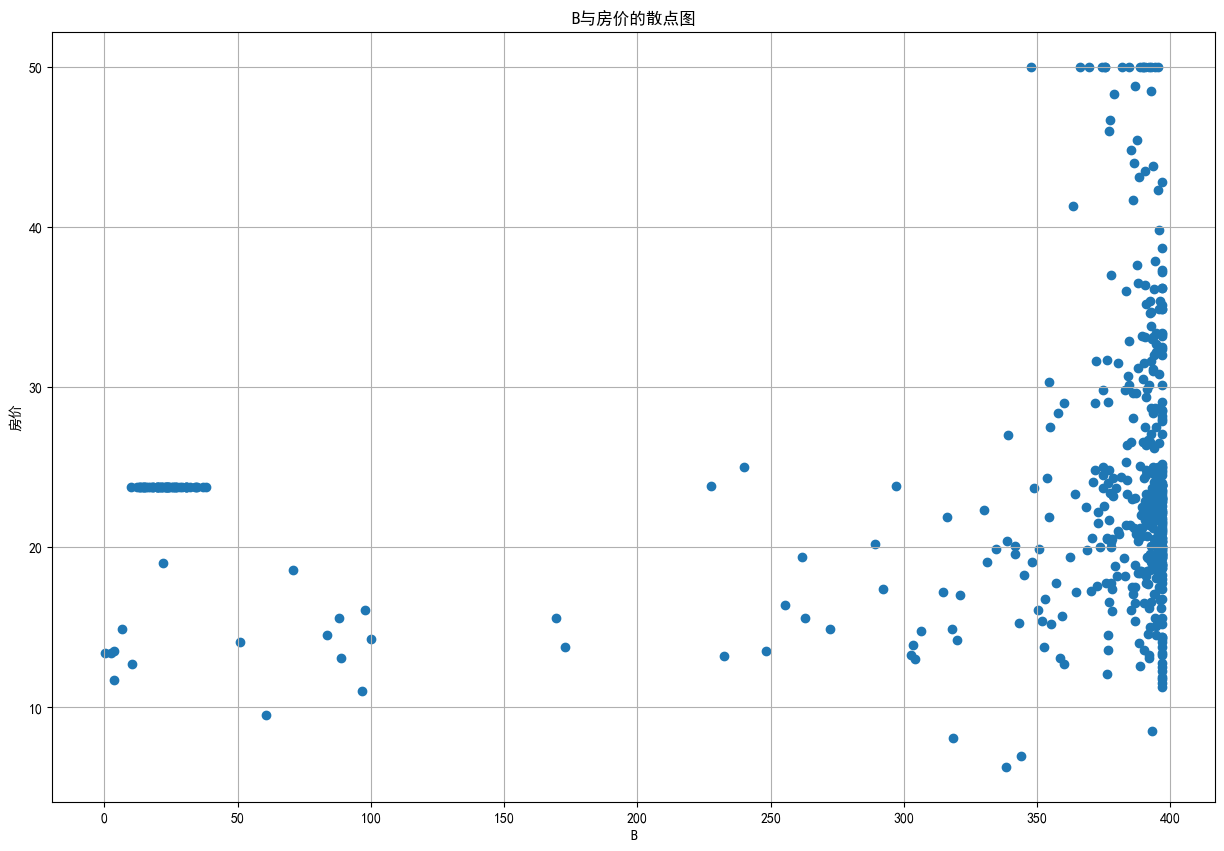

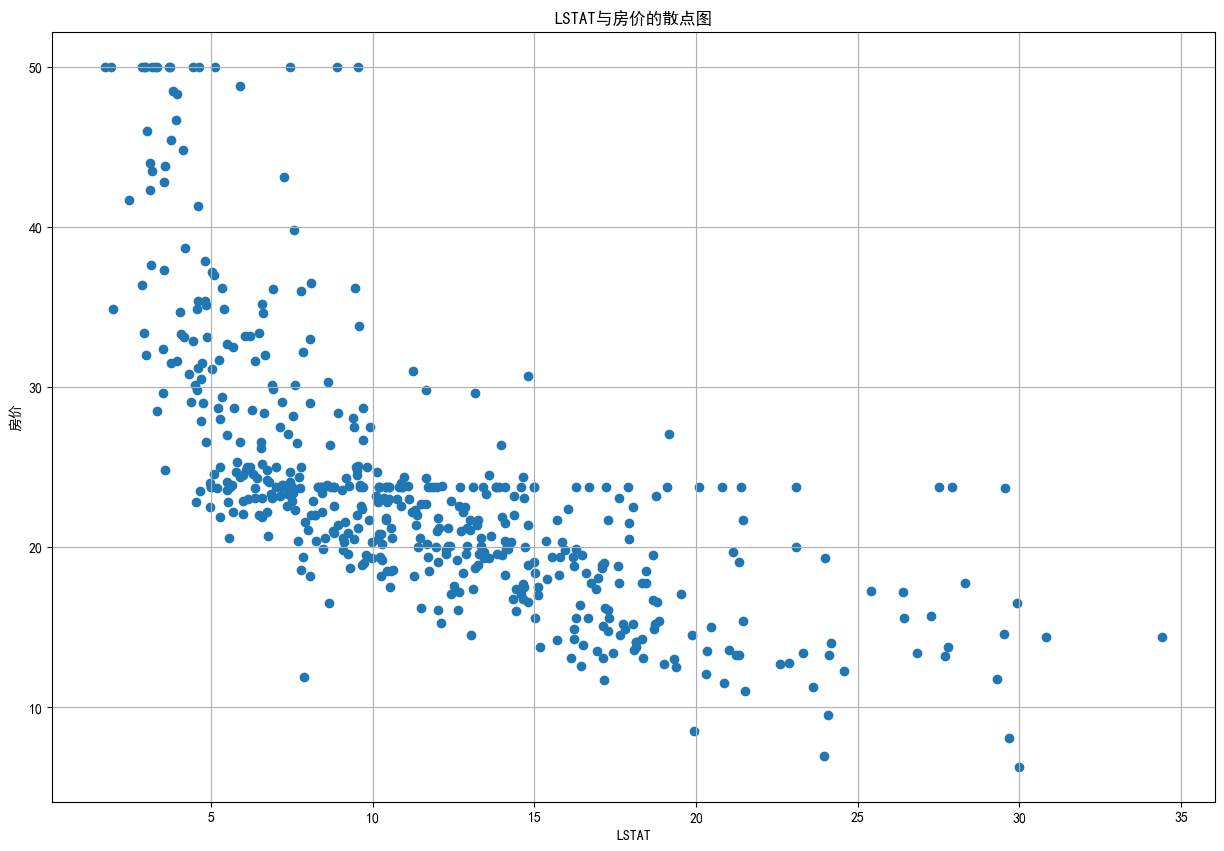

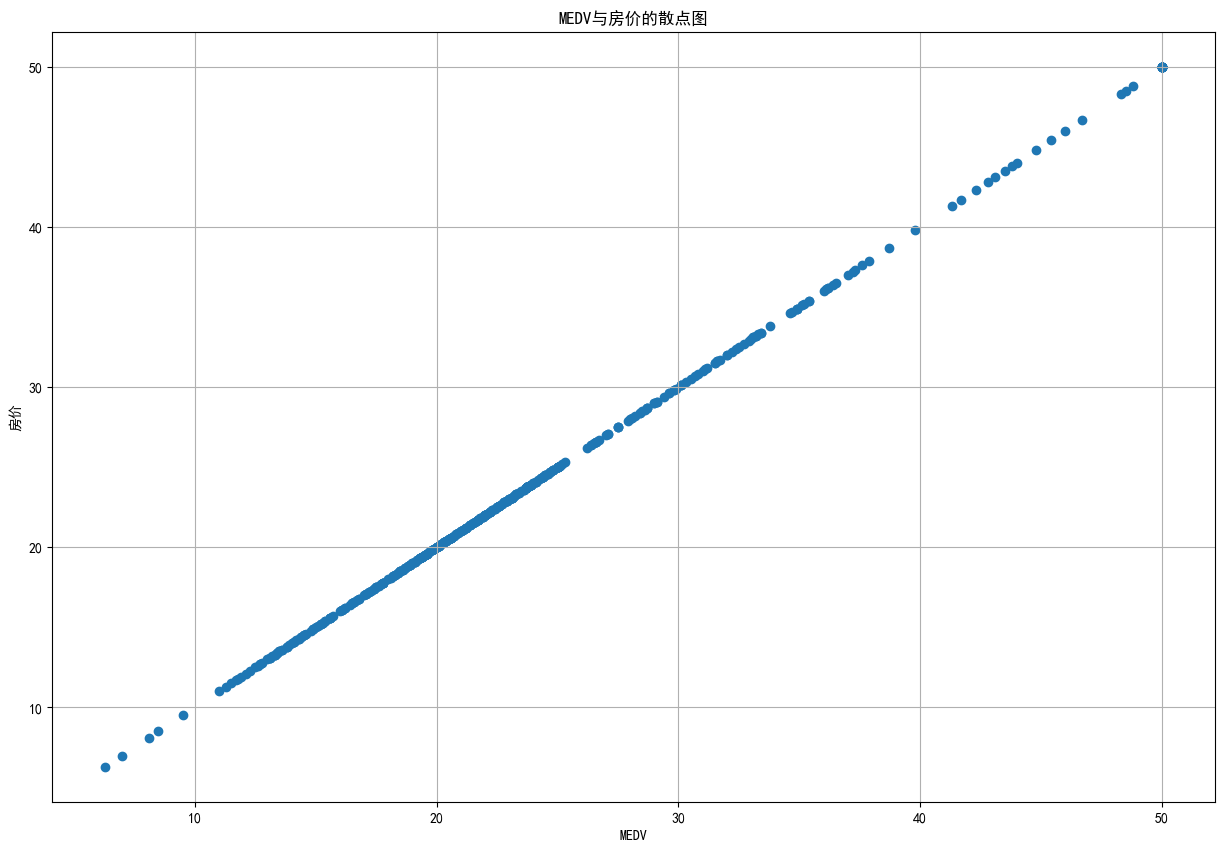

In [15]:
#散点图
for i in data.columns:
    plt.scatter(data[i],data["MEDV"])
    plt.title("%s与房价的散点图"% i)
    plt.xlabel(i)
    plt.ylabel("房价")
    plt.grid()#网格化
    plt.show()

In [16]:
#特征值矩阵
X=data.drop(["MEDV"],axis=1)

#标签矩阵
y=data["MEDV"]

#转为为numpy矩阵进行计算
X=np.array(X)
y=np.array(y)

In [17]:
#标准化
X=my_StandardScaler(X)

In [18]:
#划分数据集并转化为numpy数组进行矩阵运算
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [19]:
#多加一列特征(计算偏置)
X_train_new=np.insert(X_train,0,values=1,axis=1)
X_test_new=np.insert(X_test,0,values=1,axis=1)

In [20]:
#预测

In [21]:
#梯度下降法
alpha=0.01#步长
times=800#迭代次数
theta_1,cost=gradient_descent(alpha,times,X_train_new,y_train)
y_predict1=X_test_new.dot(theta_1)

#最小二乘法
theta_2=LSM(X_train_new,y_train)
y_predict2=X_test_new.dot(theta_2)

print("测试集数据：",y_test)
print("#"*100)
print("梯度下降法的预测值：",y_predict1)
print("#"*100)
print("最小二乘法的预测值：",y_predict2)

测试集数据： [14.5        23.75044248 19.1        19.3        22.5        23.75044248
 21.4        27.5        22.         36.1        17.8        23.2
 23.75044248 21.7        19.4        37.2        42.8        24.7
 24.5        23.9        36.4        17.4        29.6        25.
 27.5        23.8        23.75044248 21.9        23.1        16.6
 50.         23.75044248 20.2        21.8        26.7        19.2
 17.5        23.75044248 22.8        13.9        21.7        17.1
 20.         23.75044248 21.2        18.5        16.1        24.5
 23.75044248 26.6        23.6        22.9        29.8        26.4
 32.2        17.5        48.8        50.         21.4        13.3
 24.4        28.4        20.6        48.3        12.7        22.4
 25.1        25.         13.5        12.1        20.5        22.2
 20.         21.8        19.1        12.6        23.75044248 32.
 16.2        29.6        17.6        15.6        18.6        23.9
 19.9        36.         14.6        33.2        23.75044248 24.

In [22]:
#模型评估
print("梯度下降的均方误差：",MSE(y_predict1,y_test))
print("最小二乘法的均方误差：",MSE(y_predict2,y_test))

梯度下降的均方误差： 36.73194553145936
最小二乘法的均方误差： 35.10848713811143


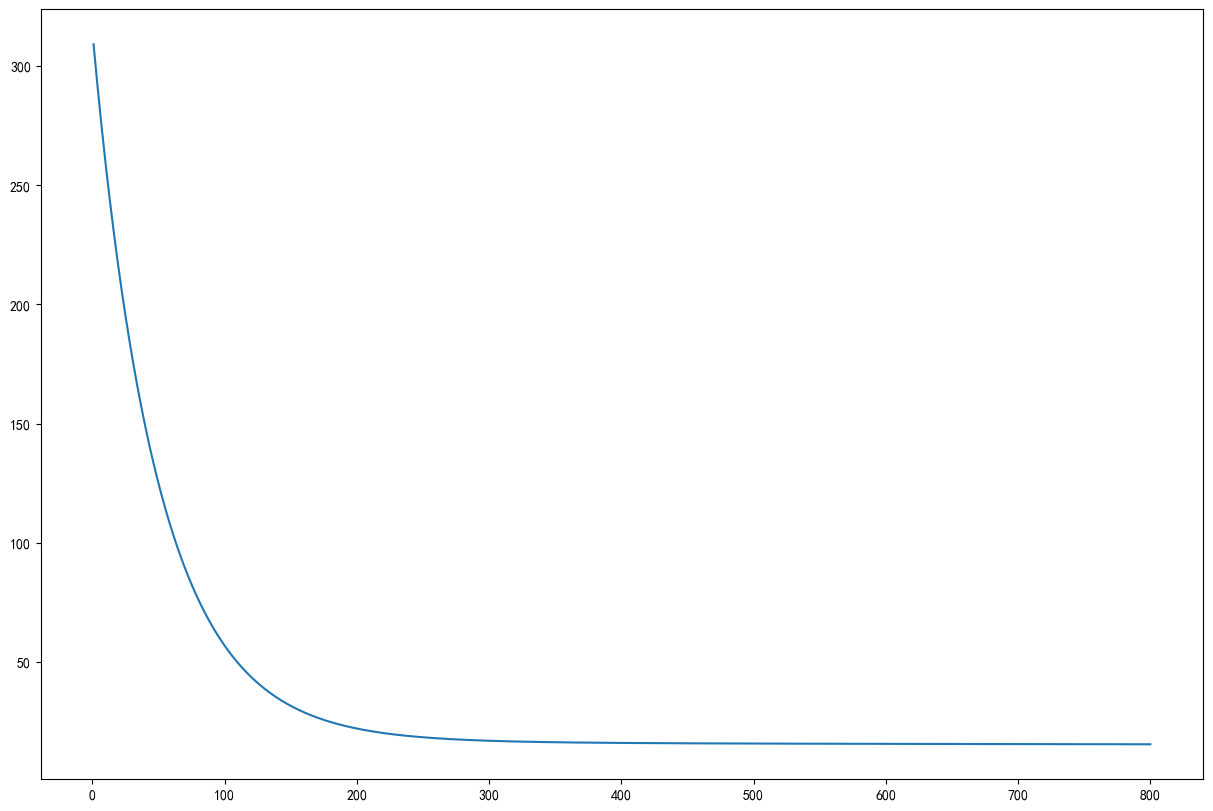

In [23]:
#梯度下降的损失函数
x_axis=np.linspace(1,800,800)
plt.plot(x_axis,cost)

In [24]:
#说明在迭代到400次时损失函数已经趋于稳定